### TEM Beta Lactamase Analysis 001

This is the general work file which will contain all the analysis of the beta lactamase.

In [1]:
%reload_ext autoreload
%autoreload 2
import os
import sys
import py4cytoscape as p4c
from pyeed.core import ProteinInfo, Alignment
from pyeed.aligners import PairwiseAligner
from pyeed.network import SequenceNetwork
import networkx as nx


##### starting point for analysis

The starting point for the beta lactamase will be a TEM Protein. Possibly TEM 01 but this is not certain.

In [2]:
starting_protein_tem = ProteinInfo.get_id("QGC48744.1")
current_path = os.path.dirname(os.getcwd())

##### simple search & save & aligment

Here we search with blast in NCBI database and create the aligments.

In [3]:
n_hits = 30
e_value = 0.05

In [22]:
blast_results_starting_protein = starting_protein_tem.ncbi_blastp(n_hits=n_hits, e_value=e_value)

🏃🏼‍♀️ Running PBLAST
╭── protein name: TEM family beta-lactamase
├── accession: QGC48744.1
├── organism: Escherichia coli
├── e-value: 0.05
╰── max hits: 30
⬇️ Fetching 30 protein entries from NCBI...
⬇️ Fetching 9 taxonomy entries from NCBI...
🎉 Done



In [23]:
# save the blast search results
output_folder_blast_search = os.path.join(current_path, "TEM-lactamase", "data", "data_blast_search_{}_{}_{}".format(starting_protein_tem.source_id.replace('.', ''), n_hits, int(e_value*1000)))
os.makedirs(output_folder_blast_search, exist_ok=True)
for hit in blast_results_starting_protein:
    with open(output_folder_blast_search + "/{}.json".format(hit.id), "w") as f:
        f.write(hit.json())

/home/niklas/anaconda3/envs/pyeed/lib/python3.11/site-packages/sdRDM/base/datamodel.py:322: UserWarning: No 'URL' and 'Commit' specified. This model might not be re-usable.
  warnings.warn(


##### network building & visualize

In [4]:
%reload_ext autoreload
%autoreload 2
# read in the saved fetched results
n_hits = 30
e_value = 0.05
name = starting_protein_tem.source_id.replace('.', '')
read_blast_folder = os.path.join(current_path, "TEM-lactamase", "data", "data_blast_search_{}_{}_{}".format(name, n_hits, int(e_value*1000)))
protein_list = []
for file in os.listdir(read_blast_folder):
    with open(os.path.join(read_blast_folder, file), "r") as f:
        protein_list.append(ProteinInfo.from_json(f))


In [5]:
# create pairwise aligments
mode = "global"
alignment_blast_search = Alignment.from_sequences(protein_list, aligner=PairwiseAligner, mode=mode)
# save the pairwise alignments
output_folder_alignments = os.path.join(current_path, "TEM-lactamase", "data", "data_alignments_pairwise_{}_{}_{}_{}".format(mode, starting_protein_tem.source_id.replace('.', ''), n_hits, int(e_value*1000)))
os.makedirs(output_folder_alignments, exist_ok=True)
for alignment in alignment_blast_search:
    with open(output_folder_alignments + "/{}.json".format(alignment.id), "w") as f:
        f.write(alignment.json())

⛓️ Running pairwise alignments: 100%|██████████| 465/465 [00:01<00:00, 290.90it/s]
/home/niklas/anaconda3/envs/pyeed/lib/python3.11/site-packages/sdRDM/base/datamodel.py:322: UserWarning: No 'URL' and 'Commit' specified. This model might not be re-usable.
  warnings.warn(


In [6]:
print(alignment_blast_search[100].json())

{
  "id": "pairwisealignment100",
  "method": "global",
  "input_sequences": [
    {
      "id": "sequence3",
      "source_id": "ANG22502.1",
      "sequence": "MGIQRSRVALIPFFAAFCLPVFAHPETLVKVKDAEDQLGARVGYIELDLNSGKILESFRPEERFPMMSTFKVLLCGAVLSRVDAGQEQLGRRIHYSQNDLVEYSPVTEKHLTDGMTVRELCSAAITMSDNTAANLLLTTIGGPKELTAFLHNMGDHVTRLDRWEPELNEAIPNDERDTTMPAAMATTLRKLLTGELLTLASRQQLIDWMEADKVAGPLLRSALPAGWFIADKSGAGERGSRGIIAALGPDGKPSRIVVIYTTGSQATMDERNRQIAEIGASLIKHW"
    },
    {
      "id": "sequence17",
      "source_id": "ANG17639.1",
      "sequence": "MSAQHFRVALIPFFAAFCLPVFAHPETLVKVKDAEDQLGARVGYIELDLNSGKILESFRPEERFPMMSTFKVLLCGAVLSRVDAGQEQLGRRIHYSQNDLVEYSPVTEKHLTDGMTVRELCSAAITMSDNTAANLLLTTIGGPKELTAFLHNMGDHVTRLDRWEPELNEAIPNDERDTTMPAAMATTLRKLLTGELLTLASRQQLIDWMEADKVAGPLLRSALPAGWFIADKSGAGERGSRGIIAALGPDGKPSRIVVIYTTGSQATMDERNRQIAEIGASLIKHW"
    }
  ],
  "aligned_sequences": [
    {
      "id": "sequence231",
      "source_id": "ANG22502.1",
      "sequence": "MGIQRS----RVALIPFFAAFCLPVFAHPETLVKVKDAEDQLGARVGYIE

In [7]:
p4c.cytoscape_ping()
p4c.cytoscape_version_info()

You are connected to Cytoscape!


{'apiVersion': 'v1',
 'cytoscapeVersion': '3.10.2',
 'automationAPIVersion': '1.9.0',
 'py4cytoscapeVersion': '1.9.0'}

In [34]:
# create a network with the SequencNetwork class
network = SequenceNetwork(
    sequences=protein_list,
    weight="score",
    threshold=1.019,
    dimensions=2,
    color="taxonomy_id",
)

# Check if the graph is created
graph = network.graph
p4c.create_network_from_networkx(graph, collection="TEM-lactamase", title="Sequence Network for TEM-lactamase 001")
"""
['attribute-circle',
 'stacked-node-layout',
 'attribute-grid',
 'degree-circle',
 'circular',
 'attributes-layout',
 'kamada-kawai',
 'force-directed',
 'cose',
 'grid',
 'hierarchical',
 'fruchterman-rheingold',
 'isom',
 'force-directed-cl']
"""
p4c.layout_network('force-directed')


⛓️ Running pairwise alignments: 100%|██████████| 465/465 [00:00<00:00, 11324.64it/s]


this is the threshold 1.019
1.015958845826566
Applying default style...
Applying preferred layout


{}

In [35]:
gal80Rexp_score_table = p4c.get_table_columns(table='node', columns='species')
gal80Rexp_score_table.head()


,species
24832,Escherichia coli
24835,synthetic construct
24838,synthetic construct
24841,Enterobacteriaceae
24844,synthetic construct


In [73]:
p4c.set_visual_style('default')

{'message': 'Visual Style applied.'}

In [99]:
import matplotlib.pyplot as plt
from py4cytoscape import gen_node_color_map

# Assuming Cytoscape is running and your network is loaded

# 1. Get unique family names from your network's node data
family_names = p4c.get_table_columns(columns='species', table='node')
# Make sure family_names is a list of unique values
family_names = list(set(family_names['species']))
print(family_names)

# 2. Generate a colormap
# matplotlib has several colormaps. Here we use 'tab20', which is good for categorical data
colors = plt.cm.tab20(range(len(family_names)))
hex_colors = ['#%02x%02x%02x' % (int(r*255), int(g*255), int(b*255)) for r, g, b, _ in colors]


# Convert RGB to hex colors for py4cytoscape
hex_colors = ['#' + ''.join([f'{int(c*255):02x}' for c in color[:3]]) for color in colors]

# 3. Create a dictionary mapping family names to colors
name_to_color_map = dict(zip(family_names, hex_colors))
print(name_to_color_map)

# 4. Define your discrete mapping for node color#

"""


        table_column (str) – Name of Cytoscape table column to map values from

        table_column_values (list) – List of values from Cytoscape table to be used in mapping

        colors (list) – list of hex colors to map to table_column_values

        mapping_type (str) – continuous, discrete or passthrough (c,d,p); default is continuous

        default_color (str) – Hex color to set as default

        style_name (str) – name for style

        network (SUID or str or None) – Name or SUID of a network or view. Default is the “current” network active in Cytoscape.

        base_url (str) – Ignore unless you need to specify a custom domain, port or version to connect to the CyREST API. Default is http://127.0.0.1:1234 and the latest version of the CyREST API supported by this version of py4cytoscape.


"""


node_color_mapping = {
    "table_column_values": family_names,
    "table_column": "species",
    "colors": hex_colors,
    "mapping_type": "d",
    "style_name": 'niklas'
}

# 5. Apply this mapping to your visual style
style_name = 'niklas'
p4c.set_node_color_default('#FFFFFF', style_name)  # Set a default color
p4c.set_node_color_mapping('species', mapping_type='discrete', default_color='#654321', style_name=style_name, table_column_values=family_names, colors=hex_colors)

['Klebsiella pneumoniae', 'Enterobacter hormaechei', 'Enterobacterales', 'Salmonella enterica', 'Enterobacteriaceae', 'Bacteria', 'Escherichia coli', 'synthetic construct', 'Shigella sonnei']
{'Klebsiella pneumoniae': '#1f77b4', 'Enterobacter hormaechei': '#aec7e8', 'Enterobacterales': '#ff7f0e', 'Salmonella enterica': '#ffbb78', 'Enterobacteriaceae': '#2ca02c', 'Bacteria': '#98df8a', 'Escherichia coli': '#d62728', 'synthetic construct': '#ff9896', 'Shigella sonnei': '#9467bd'}


''

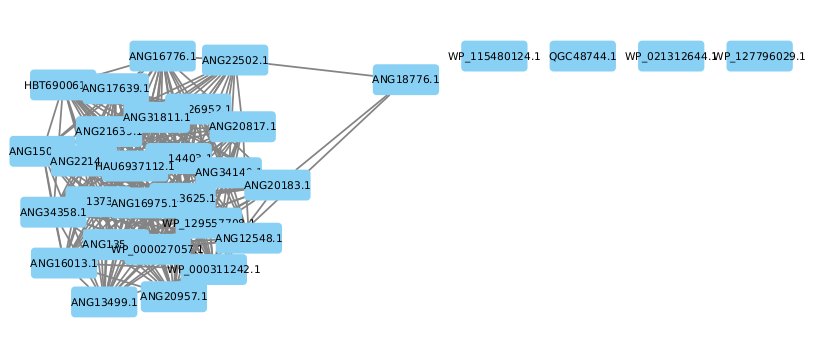

In [75]:
p4c.notebook_export_show_image()